# Car Price Predictor

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1= pd.read_csv(r'D:\TUSHAR\P168\cars24 (1).csv')
df2 = pd.read_csv(r'D:\TUSHAR\P168\cars24 (2).csv')
df3 = pd.read_csv(r'D:\TUSHAR\P168\Hyderabad.csv')
df4 = pd.read_csv(r'D:\TUSHAR\P168\Noida.csv')
df5 = pd.read_csv(r'D:\TUSHAR\P168\Banglore.csv')

In [3]:
cars = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
cars

,_9Ue0B href,_2gVj9 src,summerDiscount src,summerDiscount,_2dr28,_3FpCg,cvakB,cvakB 2,bVR0c,bVR0c 2,bVR0c 3,bVR0c 4,_2HFRN,_7udZZ,_3X7mV,_31Wtw,_3jinY,summerDiscount 2,_31Wtw 2
0,https://www.cars24.com/buy-used-hyundai-i20-20...,https://fastly-production.24c.in/hello-ar/dev/...,https://www.cars24.com/js/cbdebfd146789c1c0046...,"₹5,000",off,2010 Hyundai i20,MAGNA O 1.2,Manual,"34,913 km",2nd Owner,Petrol,MH-02,"₹4,489/month","₹2,29,599",Zero Down Payment,"₹2,34,599",NaN,NaN,NaN
1,https://www.cars24.com/buy-used-maruti-ritz-20...,https://fastly-production.24c.in/hello-ar/dev/...,NaN,NaN,NaN,2012 Maruti Ritz,VXI,Manual,"77,919 km",2nd Owner,Petrol,MH-02,"₹4,616/month","₹2,36,099",Zero Down Payment,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.cars24.com/buy-used-maruti-swift-2...,NaN,https://www.cars24.com/js/cbdebfd146789c1c0046...,"₹23,400",off,2020 Maruti Swift,VXI,Manual,"25,228 km",1st Owner,Petrol,MH-05,"₹12,469/month","₹6,37,799",Zero Down Payment,"₹6,61,199",NaN,NaN,NaN
4,https://www.cars24.com/buy-used-maruti-swift-2...,NaN,NaN,NaN,NaN,2012 Maruti Swift,VXI,Manual,"35,757 km",3rd Owner,Petrol,MH-03,"₹6,246/month","₹3,19,499",Zero Down Payment,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,https://www.cars24.com/buy-used-hyundai-i10-20...,NaN,NaN,NaN,NaN,2011 Hyundai i10,MAGNA 1.2 KAPPA2,Manual,"50,513 km",2nd Owner,Petrol,KA-53,"₹6,031/month","₹3,08,499",Zero Down Payment,NaN,NaN,NaN,NaN
4452,https://www.cars24.com/buy-used-hyundai-new-sa...,NaN,NaN,NaN,NaN,2021 Hyundai NEW SANTRO,1.1 ERA EXICUTIVE,Manual,"28,441 km",1st Owner,Petrol,KA-09,"₹10,733/month","₹5,48,999",Zero Down Payment,NaN,NaN,NaN,NaN
4453,https://www.cars24.com/buy-used-kia-seltos-202...,NaN,https://www.cars24.com/js/cbdebfd146789c1c0046...,"₹1,452",NaN,2020 KIA SELTOS,HTX+ AT 1.5 DIESEL,Automatic,"44,152 km",1st Owner,Diesel,KA-34,"₹35,355/month","₹18,82,699",Zero Down Payment,"₹36,807/month",SAVE,/m,NaN
4454,https://www.cars24.com/buy-used-ford-ecosport-...,NaN,https://www.cars24.com/js/cbdebfd146789c1c0046...,₹654,NaN,2016 Ford Ecosport,1.5 TITANIUM TI VCT AT,Automatic,"73,304 km",1st Owner,Petrol,KA-51,"₹15,925/month","₹8,47,999",Zero Down Payment,"₹16,579/month",SAVE,/m,NaN


# Data Preprocessing

In [4]:
cars.rename(columns={'_9Ue0B href':'Url','summerDiscount':'Summer_Discount','_3FpCg':'Name','cvakB':'Model','cvakB 2':'Transmission','bVR0c':'Kms','bVR0c 2':'Owner','bVR0c 3':'Fuel_Type','bVR0c 4':'Registration','_2HFRN':'EMI','_7udZZ':'Price','_3X7mV':'Down_Payment','_31Wtw 2':'Showroom_Price'},inplace=True)

In [5]:
cars =cars.drop(['_2gVj9 src','summerDiscount src','Summer_Discount','_2dr28','_31Wtw','_3jinY','summerDiscount 2','Showroom_Price','Url'],axis=1)

In [6]:
cars.head()

,Name,Model,Transmission,Kms,Owner,Fuel_Type,Registration,EMI,Price,Down_Payment
0,2010 Hyundai i20,MAGNA O 1.2,Manual,"34,913 km",2nd Owner,Petrol,MH-02,"₹4,489/month","₹2,29,599",Zero Down Payment
1,2012 Maruti Ritz,VXI,Manual,"77,919 km",2nd Owner,Petrol,MH-02,"₹4,616/month","₹2,36,099",Zero Down Payment
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020 Maruti Swift,VXI,Manual,"25,228 km",1st Owner,Petrol,MH-05,"₹12,469/month","₹6,37,799",Zero Down Payment
4,2012 Maruti Swift,VXI,Manual,"35,757 km",3rd Owner,Petrol,MH-03,"₹6,246/month","₹3,19,499",Zero Down Payment


In [7]:
cars.shape

(4456, 10)

In [8]:
cars.isnull().sum()

Name              5
Model             5
Transmission    294
Kms               5
Owner             5
Fuel_Type         5
Registration      5
EMI               5
Price             5
Down_Payment      5
dtype: int64

In [9]:
cars.duplicated().sum()

1375

In [10]:
cars=cars.drop_duplicates()

In [11]:
cars.duplicated().sum()

0

In [12]:
cars.isnull().sum()

Name              1
Model             1
Transmission    198
Kms               1
Owner             1
Fuel_Type         1
Registration      1
EMI               1
Price             1
Down_Payment      1
dtype: int64

In [13]:
cars=cars.dropna()

In [14]:
cars.isnull().sum()

Name            0
Model           0
Transmission    0
Kms             0
Owner           0
Fuel_Type       0
Registration    0
EMI             0
Price           0
Down_Payment    0
dtype: int64

In [15]:
cars.shape

(2883, 10)

In [16]:
cars24 = cars

In [17]:
new = cars24["Name"].str.split(" ",n = 1, expand = True)

In [18]:
cars24["Year"] = new[0]
cars24["Name"] = new[1]

In [19]:
cars24.head()

,Name,Model,Transmission,Kms,Owner,Fuel_Type,Registration,EMI,Price,Down_Payment,Year
0,Hyundai i20,MAGNA O 1.2,Manual,"34,913 km",2nd Owner,Petrol,MH-02,"₹4,489/month","₹2,29,599",Zero Down Payment,2010
1,Maruti Ritz,VXI,Manual,"77,919 km",2nd Owner,Petrol,MH-02,"₹4,616/month","₹2,36,099",Zero Down Payment,2012
3,Maruti Swift,VXI,Manual,"25,228 km",1st Owner,Petrol,MH-05,"₹12,469/month","₹6,37,799",Zero Down Payment,2020
4,Maruti Swift,VXI,Manual,"35,757 km",3rd Owner,Petrol,MH-03,"₹6,246/month","₹3,19,499",Zero Down Payment,2012
5,Maruti Swift,VXI,Manual,"37,591 km",1st Owner,Petrol,MH-02,"₹8,067/month","₹4,12,649",Zero Down Payment,2013


In [20]:
new2 = cars24["Name"].str.split(" ",n = 1, expand = True)
new3 = cars24["Registration"].str.split("-",n = 1, expand = True)

In [21]:
cars24["Brand"] = new2[0]
cars24["State"] = new3[0]

In [22]:
cars24.head()

,Name,Model,Transmission,Kms,Owner,Fuel_Type,Registration,EMI,Price,Down_Payment,Year,Brand,State
0,Hyundai i20,MAGNA O 1.2,Manual,"34,913 km",2nd Owner,Petrol,MH-02,"₹4,489/month","₹2,29,599",Zero Down Payment,2010,Hyundai,MH
1,Maruti Ritz,VXI,Manual,"77,919 km",2nd Owner,Petrol,MH-02,"₹4,616/month","₹2,36,099",Zero Down Payment,2012,Maruti,MH
3,Maruti Swift,VXI,Manual,"25,228 km",1st Owner,Petrol,MH-05,"₹12,469/month","₹6,37,799",Zero Down Payment,2020,Maruti,MH
4,Maruti Swift,VXI,Manual,"35,757 km",3rd Owner,Petrol,MH-03,"₹6,246/month","₹3,19,499",Zero Down Payment,2012,Maruti,MH
5,Maruti Swift,VXI,Manual,"37,591 km",1st Owner,Petrol,MH-02,"₹8,067/month","₹4,12,649",Zero Down Payment,2013,Maruti,MH


In [23]:
cars24['State'] = cars24['State'].replace({'MH':'Maharashtra','HR':'Hariyana','DL':'Delhi','UP':'Uttar Pradesh','TS':'Telangana','AP':'Andhra Pradesh','KA':'Karnataka','22':'Maharashtra'},regex=True)

In [24]:
cars24['Price'] = cars24['Price'].replace({'₹': '',',': ''},regex=True)
cars24['EMI'] = cars24['EMI'].replace({'₹': '',',': '','/month':''},regex=True)
cars24['Kms'] = cars24['Kms'].replace({'km':'',',': ''},regex=True)

In [25]:
cars24['Owner']=cars24['Owner'].replace({'1st Owner':'1','2nd Owner':'2','3rd Owner':'3'},regex=True)
cars24['Down_Payment']=cars24['Down_Payment'].replace({'Zero Down Payment':'0'},regex=True)
cars24

,Name,Model,Transmission,Kms,Owner,Fuel_Type,Registration,EMI,Price,Down_Payment,Year,Brand,State
0,Hyundai i20,MAGNA O 1.2,Manual,34913,2,Petrol,MH-02,4489,229599,0,2010,Hyundai,Maharashtra
1,Maruti Ritz,VXI,Manual,77919,2,Petrol,MH-02,4616,236099,0,2012,Maruti,Maharashtra
3,Maruti Swift,VXI,Manual,25228,1,Petrol,MH-05,12469,637799,0,2020,Maruti,Maharashtra
4,Maruti Swift,VXI,Manual,35757,3,Petrol,MH-03,6246,319499,0,2012,Maruti,Maharashtra
5,Maruti Swift,VXI,Manual,37591,1,Petrol,MH-02,8067,412649,0,2013,Maruti,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,Hyundai i10,MAGNA 1.2 KAPPA2,Manual,50513,2,Petrol,KA-53,6031,308499,0,2011,Hyundai,Karnataka
4452,Hyundai NEW SANTRO,1.1 ERA EXICUTIVE,Manual,28441,1,Petrol,KA-09,10733,548999,0,2021,Hyundai,Karnataka
4453,KIA SELTOS,HTX+ AT 1.5 DIESEL,Automatic,44152,1,Diesel,KA-34,35355,1882699,0,2020,KIA,Karnataka
4454,Ford Ecosport,1.5 TITANIUM TI VCT AT,Automatic,73304,1,Petrol,KA-51,15925,847999,0,2016,Ford,Karnataka


In [26]:
from datetime import date
from datetime import datetime

In [27]:
def calculate_age(born):
    born = datetime.strptime(born,"%Y").date()
    today=date.today()
    return today.year-born.year-((today.year)<(born.year))
cars24['Age']=cars24['Year'].apply(calculate_age)

In [28]:
cars24

,Name,Model,Transmission,Kms,Owner,Fuel_Type,Registration,EMI,Price,Down_Payment,Year,Brand,State,Age
0,Hyundai i20,MAGNA O 1.2,Manual,34913,2,Petrol,MH-02,4489,229599,0,2010,Hyundai,Maharashtra,12
1,Maruti Ritz,VXI,Manual,77919,2,Petrol,MH-02,4616,236099,0,2012,Maruti,Maharashtra,10
3,Maruti Swift,VXI,Manual,25228,1,Petrol,MH-05,12469,637799,0,2020,Maruti,Maharashtra,2
4,Maruti Swift,VXI,Manual,35757,3,Petrol,MH-03,6246,319499,0,2012,Maruti,Maharashtra,10
5,Maruti Swift,VXI,Manual,37591,1,Petrol,MH-02,8067,412649,0,2013,Maruti,Maharashtra,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,Hyundai i10,MAGNA 1.2 KAPPA2,Manual,50513,2,Petrol,KA-53,6031,308499,0,2011,Hyundai,Karnataka,11
4452,Hyundai NEW SANTRO,1.1 ERA EXICUTIVE,Manual,28441,1,Petrol,KA-09,10733,548999,0,2021,Hyundai,Karnataka,1
4453,KIA SELTOS,HTX+ AT 1.5 DIESEL,Automatic,44152,1,Diesel,KA-34,35355,1882699,0,2020,KIA,Karnataka,2
4454,Ford Ecosport,1.5 TITANIUM TI VCT AT,Automatic,73304,1,Petrol,KA-51,15925,847999,0,2016,Ford,Karnataka,6


# EDA

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
cars24.shape

(2883, 14)

In [31]:
cars24.columns

Index(['Name', 'Model', 'Transmission', 'Kms', 'Owner', 'Fuel_Type',
       'Registration', 'EMI', 'Price', 'Down_Payment', 'Year', 'Brand',
       'State', 'Age'],
      dtype='object')

In [32]:
cars24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 0 to 4455
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          2883 non-null   object
 1   Model         2883 non-null   object
 2   Transmission  2883 non-null   object
 3   Kms           2883 non-null   object
 4   Owner         2883 non-null   object
 5   Fuel_Type     2883 non-null   object
 6   Registration  2883 non-null   object
 7   EMI           2883 non-null   object
 8   Price         2883 non-null   object
 9   Down_Payment  2883 non-null   object
 10  Year          2883 non-null   object
 11  Brand         2883 non-null   object
 12  State         2883 non-null   object
 13  Age           2883 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 337.9+ KB


In [33]:
cars24.describe()

,Age
count,2883.000000
mean,4.715227
std,2.716490
min,0.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,13.000000


In [34]:
cars24.median()

Kms              39950.0
Owner                1.0
EMI              11380.0
Price           582099.0
Down_Payment         0.0
Year              2018.0
Age                  4.0
dtype: float64

In [35]:
cars24.isnull().sum()

Name            0
Model           0
Transmission    0
Kms             0
Owner           0
Fuel_Type       0
Registration    0
EMI             0
Price           0
Down_Payment    0
Year            0
Brand           0
State           0
Age             0
dtype: int64

In [36]:
cars24.duplicated().sum()

0

##### "Brand"

In [37]:
cars24['Brand'].nunique()

18

In [38]:
cars24['Brand'].unique()

array(['Hyundai', 'Maruti', 'Renault', 'Datsun', 'Honda', 'Toyota',
       'Volkswagen', 'Tata', 'MG', 'Ford', 'Mercedes', 'KIA', 'Skoda',
       'Mahindra', 'Nissan', 'Jeep', 'Jaguar', 'Audi'], dtype=object)

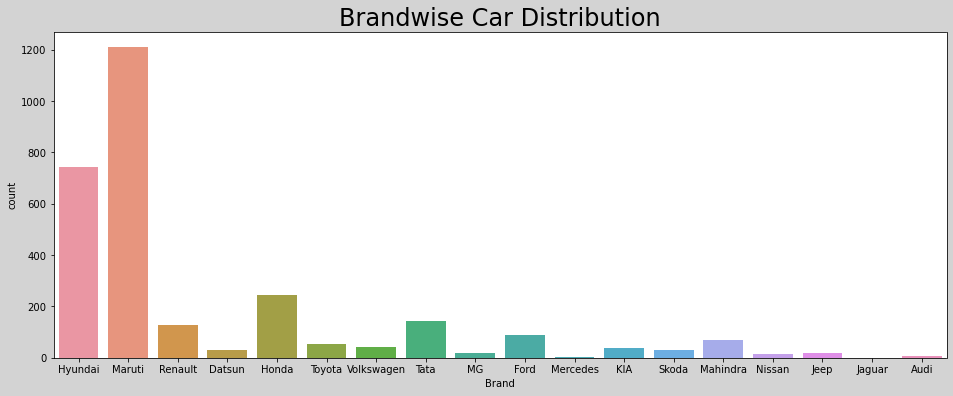

In [39]:
plt.figure(figsize=(16,6),facecolor='lightgrey')
sns.countplot(cars24['Brand'])
plt.title('Brandwise Car Distribution',fontsize=24)
plt.show()

##### "Name"

In [40]:
cars24['Name'].nunique()

110

In [41]:
cars24['Name'].unique()

array(['Hyundai i20', 'Maruti Ritz', 'Maruti Swift', 'Maruti Wagon R 1.0',
       'Maruti New  Wagon-R', 'Maruti Swift Dzire', 'Maruti Alto 800',
       'Renault Kwid', 'Datsun Redi Go', 'Honda Brio', 'Hyundai AURA',
       'Toyota Corolla Altis', 'Maruti Alto K10', 'Honda City',
       'Maruti Celerio', 'Volkswagen Polo', 'Hyundai Grand i10',
       'Toyota Etios Liva', 'Hyundai Verna', 'Maruti Dzire',
       'Volkswagen Vento', 'Tata TIGOR', 'MG HECTOR', 'Maruti Ertiga',
       'Hyundai i10', 'Tata Tiago', 'Ford Ecosport', 'Honda Amaze',
       'Mercedes Benz E Class', 'KIA SELTOS', 'Hyundai Elite i20',
       'Maruti S PRESSO', 'Renault Duster', 'Skoda Rapid', 'Honda Jazz',
       'Honda CRV', 'Tata Harrier', 'Mahindra XUV500', 'Maruti Ciaz',
       'Maruti Eeco', 'Maruti Wagon R Stingray', 'Maruti Baleno',
       'Hyundai Creta', 'Hyundai Xcent', 'Maruti IGNIS', 'Maruti S Cross',
       'Hyundai GRAND I10 NIOS', 'Maruti Vitara Brezza',
       'Hyundai NEW SANTRO', 'Maruti Celerio X

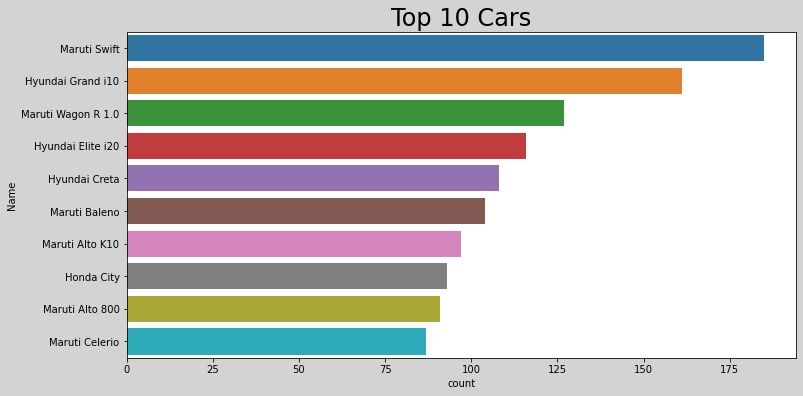

In [42]:
plt.figure(figsize=(12,6),facecolor='lightgrey')
sns.countplot(y='Name',data=cars24,order=cars24['Name'].value_counts().index[0:10])
plt.title('Top 10 Cars',fontsize=24)
plt.show()

##### "Year"

In [43]:
cars24['Year'].nunique()

14

In [44]:
cars24['Year'].unique()

array(['2010', '2012', '2020', '2013', '2017', '2022', '2016', '2021',
       '2015', '2014', '2011', '2019', '2018', '2009'], dtype=object)

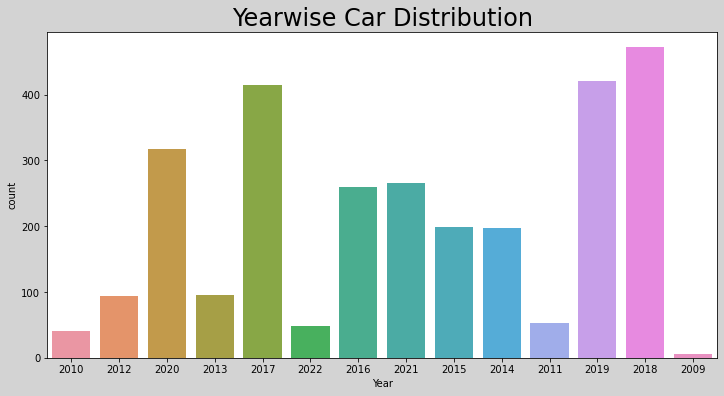

In [45]:
plt.figure(figsize=(12,6),facecolor='lightgrey')
sns.countplot(cars24['Year'])
plt.title('Yearwise Car Distribution',fontsize=24)
plt.show()

##### "Transmission"

In [46]:
cars24['Transmission'].nunique()

2

In [47]:
cars24['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

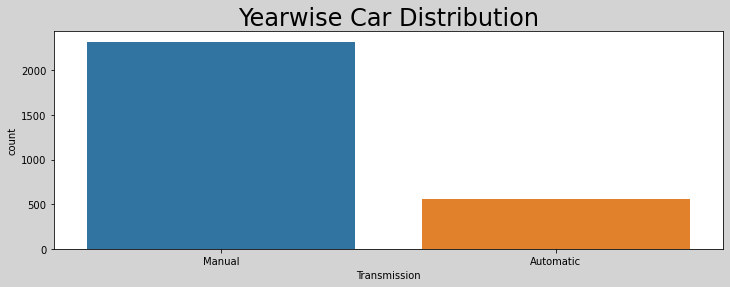

In [48]:
plt.figure(figsize=(12,4),facecolor='lightgrey')
sns.countplot(cars24['Transmission'])
plt.title('Yearwise Car Distribution',fontsize=24)
plt.show()

##### "Kms"

In [49]:
cars24['Kms'].nunique()

2772

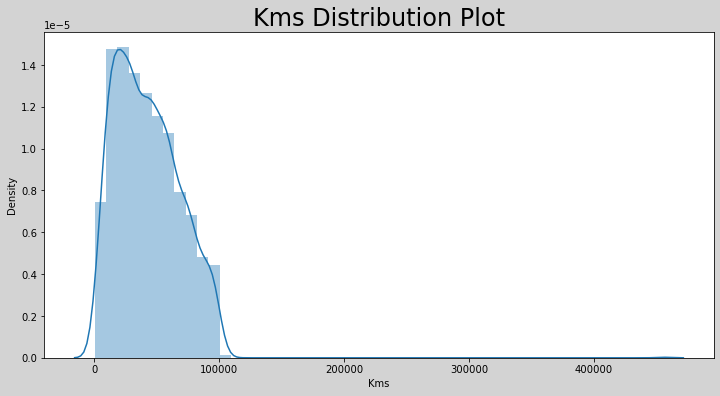

In [50]:
plt.figure(figsize=[12,6],facecolor='lightgrey')
sns.distplot(cars24['Kms'])
plt.title('Kms Distribution Plot',fontsize=24)
plt.show()

##### "Owner"

In [51]:
cars24['Owner'].nunique()

3

In [52]:
cars24['Owner'].unique()

array(['2', '1', '3'], dtype=object)

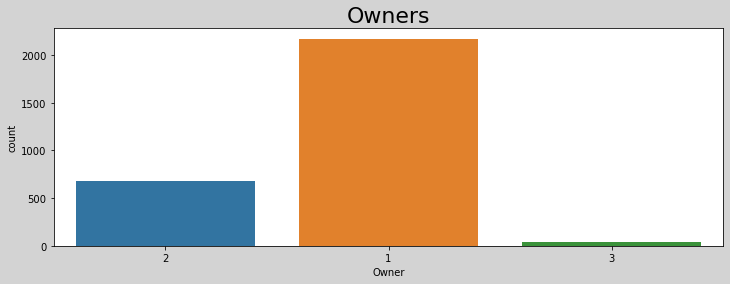

In [53]:
plt.figure(figsize=(12,4),facecolor='lightgrey')
sns.countplot(cars24['Owner'])
plt.title('Owners',fontsize=22)
plt.show()

##### "Fuel_Type"

In [54]:
cars24['Fuel_Type'].nunique()

3

In [55]:
cars24['Fuel_Type'].unique()

array(['Petrol', 'Petrol + CNG', 'Diesel'], dtype=object)

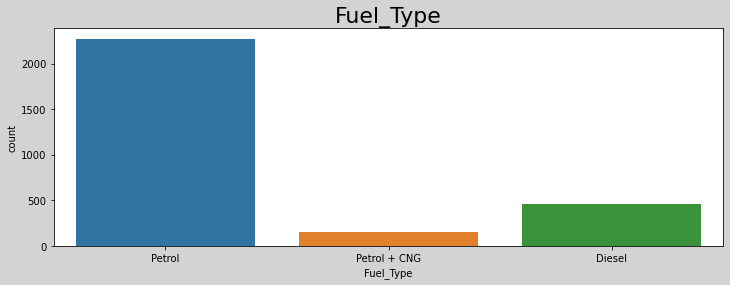

In [56]:
plt.figure(figsize=(12,4),facecolor='lightgrey')
sns.countplot(cars24['Fuel_Type'])
plt.title('Fuel_Type',fontsize=22)
plt.show()

##### "EMI"

In [57]:
cars24['EMI'].nunique()

2454

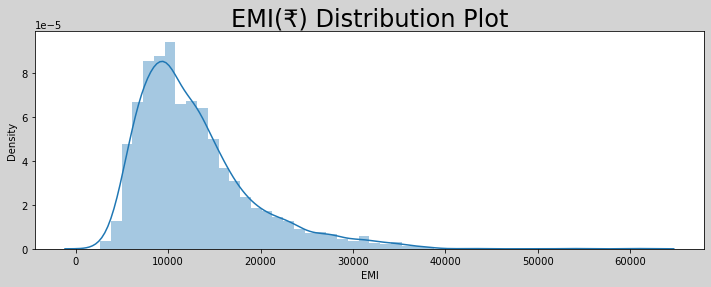

In [58]:
plt.figure(figsize=[12,4],facecolor='lightgrey')
sns.distplot(cars24['EMI'])
plt.title('EMI(₹) Distribution Plot',fontsize=24)
plt.show()

##### "Price"

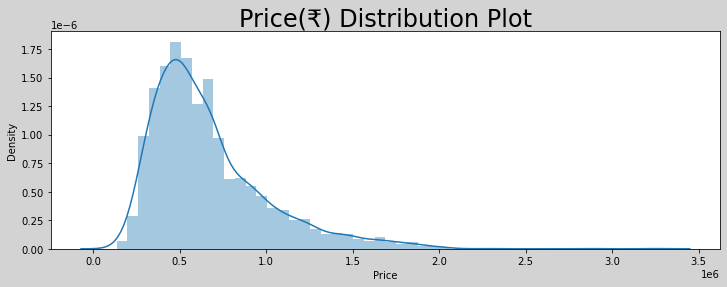

In [59]:
plt.figure(figsize=[12,4],facecolor='lightgrey')
sns.distplot(cars24['Price'])
plt.title('Price(₹) Distribution Plot',fontsize=24)
plt.show()

##### "State"

In [60]:
cars24['State'].nunique()

7

In [61]:
cars24['State'].unique()

array(['Maharashtra', 'Hariyana', 'Delhi', 'Uttar Pradesh', 'Telangana',
       'Andhra Pradesh', 'Karnataka'], dtype=object)

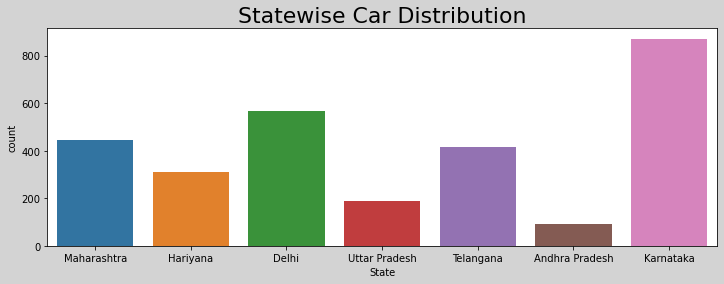

In [62]:
plt.figure(figsize=(12,4),facecolor='lightgrey')
sns.countplot(cars24['State'])
plt.title('Statewise Car Distribution',fontsize=22)
plt.show()

##### "Age"

In [63]:
cars24['Age'].nunique()

14

In [64]:
cars24['Age'].unique()

array([12, 10,  2,  9,  5,  0,  6,  1,  7,  8, 11,  3,  4, 13],
      dtype=int64)

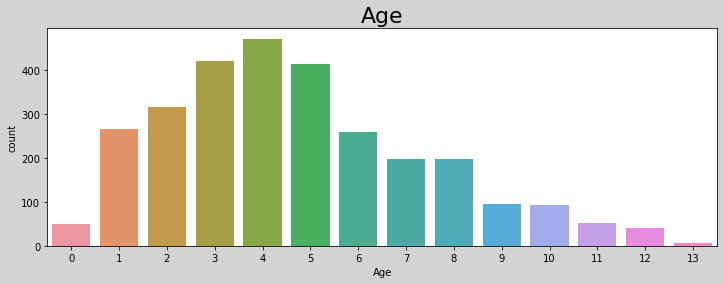

In [65]:
plt.figure(figsize=(12,4),facecolor='lightgrey')
sns.countplot(cars24['Age'])
plt.title('Age',fontsize=22)
plt.show()

In [66]:
cars24.to_csv("cars24dash.csv")

In [68]:
import pickle

In [69]:
cars24dash = pd.read_csv ('cars24dash.csv')

In [70]:
pickle.dump(cars24dash,open('cars24dash.pkl','wb'))

In [72]:
cars24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 0 to 4455
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          2883 non-null   object
 1   Model         2883 non-null   object
 2   Transmission  2883 non-null   object
 3   Kms           2883 non-null   object
 4   Owner         2883 non-null   object
 5   Fuel_Type     2883 non-null   object
 6   Registration  2883 non-null   object
 7   EMI           2883 non-null   object
 8   Price         2883 non-null   object
 9   Down_Payment  2883 non-null   object
 10  Year          2883 non-null   object
 11  Brand         2883 non-null   object
 12  State         2883 non-null   object
 13  Age           2883 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 337.9+ KB


In [73]:
cars24

,Name,Model,Transmission,Kms,Owner,Fuel_Type,Registration,EMI,Price,Down_Payment,Year,Brand,State,Age
0,Hyundai i20,MAGNA O 1.2,Manual,34913,2,Petrol,MH-02,4489,229599,0,2010,Hyundai,Maharashtra,12
1,Maruti Ritz,VXI,Manual,77919,2,Petrol,MH-02,4616,236099,0,2012,Maruti,Maharashtra,10
3,Maruti Swift,VXI,Manual,25228,1,Petrol,MH-05,12469,637799,0,2020,Maruti,Maharashtra,2
4,Maruti Swift,VXI,Manual,35757,3,Petrol,MH-03,6246,319499,0,2012,Maruti,Maharashtra,10
5,Maruti Swift,VXI,Manual,37591,1,Petrol,MH-02,8067,412649,0,2013,Maruti,Maharashtra,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,Hyundai i10,MAGNA 1.2 KAPPA2,Manual,50513,2,Petrol,KA-53,6031,308499,0,2011,Hyundai,Karnataka,11
4452,Hyundai NEW SANTRO,1.1 ERA EXICUTIVE,Manual,28441,1,Petrol,KA-09,10733,548999,0,2021,Hyundai,Karnataka,1
4453,KIA SELTOS,HTX+ AT 1.5 DIESEL,Automatic,44152,1,Diesel,KA-34,35355,1882699,0,2020,KIA,Karnataka,2
4454,Ford Ecosport,1.5 TITANIUM TI VCT AT,Automatic,73304,1,Petrol,KA-51,15925,847999,0,2016,Ford,Karnataka,6


In [74]:
cars24.info() #Checking Data Type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 0 to 4455
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          2883 non-null   object
 1   Model         2883 non-null   object
 2   Transmission  2883 non-null   object
 3   Kms           2883 non-null   object
 4   Owner         2883 non-null   object
 5   Fuel_Type     2883 non-null   object
 6   Registration  2883 non-null   object
 7   EMI           2883 non-null   object
 8   Price         2883 non-null   object
 9   Down_Payment  2883 non-null   object
 10  Year          2883 non-null   object
 11  Brand         2883 non-null   object
 12  State         2883 non-null   object
 13  Age           2883 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 337.9+ KB


In [75]:
Backup=cars24.copy()

# Model Building

In [76]:
X=cars24.drop(columns=['Price','Down_Payment'])
y=cars24['Price']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [78]:
X_train.shape

(2306, 12)

In [79]:
X_test.shape

(577, 12)

In [80]:
y_train.shape

(2306,)

In [81]:
y_test.shape

(577,)

#### OneHotEncoder

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
onehot = OneHotEncoder()
onehot.fit(X[['Name','Model','Transmission','Fuel_Type','Registration','Brand','State']])

OneHotEncoder()

In [84]:
categories=onehot.categories_

In [85]:
categories

[array(['Audi A3', 'Audi A6', 'Audi Q3', 'Audi Q5', 'Datsun Go',
        'Datsun Go Plus', 'Datsun Redi Go', 'Ford Ecosport',
        'Ford Endeavour', 'Ford FREESTYLE', 'Ford Figo',
        'Ford Figo Aspire', 'Ford New Figo', 'Honda Amaze', 'Honda BR-V',
        'Honda Brio', 'Honda CRV', 'Honda City', 'Honda Civic',
        'Honda Jazz', 'Honda WR-V', 'Hyundai AURA', 'Hyundai Accent',
        'Hyundai Creta', 'Hyundai Elite i20', 'Hyundai Eon',
        'Hyundai GRAND I10 NIOS', 'Hyundai Grand i10', 'Hyundai NEW I20',
        'Hyundai NEW SANTRO', 'Hyundai New Elantra', 'Hyundai Santro Xing',
        'Hyundai Tucson New', 'Hyundai VENUE', 'Hyundai Verna',
        'Hyundai Xcent', 'Hyundai i10', 'Hyundai i20',
        'Hyundai i20 Active', 'Jaguar XF', 'Jeep Compass', 'KIA SELTOS',
        'MG HECTOR', 'Mahindra Bolero', 'Mahindra KUV 100 NXT',
        'Mahindra Kuv100', 'Mahindra MARAZZO', 'Mahindra Scorpio',
        'Mahindra TUV300', 'Mahindra Thar', 'Mahindra XUV 3OO',
        'Ma

In [86]:
from sklearn.compose import make_column_transformer

In [87]:
column_transform = make_column_transformer((OneHotEncoder(categories=onehot.categories_),['Name','Model','Transmission','Fuel_Type','Registration','Brand','State']),remainder='passthrough')

### 1. Linear Regression Model

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
LR=LinearRegression()

In [90]:
from sklearn.pipeline import make_pipeline

In [91]:
model_LR=make_pipeline(column_transform,LR)

In [92]:
model_LR.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3', 'Audi A6', 'Audi Q3', 'Audi Q5', 'Datsun Go',
       'Datsun Go Plus', 'Datsun Redi Go', 'Ford Ecosport',
       'Ford Endeavour', 'Ford FREESTYLE', 'Ford Figo',
       'Ford Figo Aspire', 'Ford New Figo', 'Honda Amaze', 'Honda BR-V',
       'Honda Brio', 'Hon...
                                                                            array(['Audi', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep',
       'KIA', 'MG', 'Mahindra', 'Maruti', 'Mercedes', 'Nissan', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['Andhra Pradesh', 'Delhi', 'Hariyana', 'Karnataka', 'Maharashtra',
       'Telangana', 'Uttar Pradesh'], dtype=object)]),
                                                  ['Name', 'Model',
                                                   'Transmission', 'Fuel_Type',
                                                   'Registration', 'Brand',
                                                   'State'])])),
                ('linearregression', LinearRegression())])

In [93]:
y_pred_LR=model_LR.predict(X_test)

In [94]:
y_pred_LR

array([ 390247.6702113 , 1198114.89324324,  958700.06636634,
        808731.01395044,  499281.48978981,  357992.45105007,
       1044240.22682062,  568657.89887975,  656405.4327337 ,
        311682.61716563,  408010.99321734,  691030.094654  ,
        614986.59453871,  626858.5268696 ,  470987.25352125,
        441056.17568286,  579281.36137042,  485111.2001848 ,
        570572.3813097 ,  897798.62582864, 1461978.9905588 ,
        566580.6699022 ,  337862.52837931,  642760.03575264,
        983014.62699718,  710487.62336166,  710761.81696333,
        428578.88427905,  295209.28511777,  375970.9083176 ,
        439963.1016781 ,  656327.28206873,  729423.04391209,
        313178.10148652,  257478.15308984,  371543.43620992,
        716616.43182581,  456060.91892723,  515615.60318729,
        315822.79091988,  375507.38652326,  704661.91121824,
       1033173.53362624,  306380.69592344,  695863.85140489,
        514992.16579718,  452311.34935363,  640286.93286395,
       1238894.73283955,

In [95]:
from sklearn.metrics import r2_score

In [96]:
LR_score=r2_score(y_test,y_pred_LR)*100

In [97]:
LR_score

99.95453240922735

In [98]:
import pickle

In [99]:
pickle.dump(model_LR,open('model_LRc.pkl','wb'))

In [100]:
cars24.head(5)

,Name,Model,Transmission,Kms,Owner,Fuel_Type,Registration,EMI,Price,Down_Payment,Year,Brand,State,Age
0,Hyundai i20,MAGNA O 1.2,Manual,34913,2,Petrol,MH-02,4489,229599,0,2010,Hyundai,Maharashtra,12
1,Maruti Ritz,VXI,Manual,77919,2,Petrol,MH-02,4616,236099,0,2012,Maruti,Maharashtra,10
3,Maruti Swift,VXI,Manual,25228,1,Petrol,MH-05,12469,637799,0,2020,Maruti,Maharashtra,2
4,Maruti Swift,VXI,Manual,35757,3,Petrol,MH-03,6246,319499,0,2012,Maruti,Maharashtra,10
5,Maruti Swift,VXI,Manual,37591,1,Petrol,MH-02,8067,412649,0,2013,Maruti,Maharashtra,9


In [101]:
model_LR.predict(pd.DataFrame([['Maruti Swift','VXI','Manual',99913,2,'Petrol','MH-05',12000,2014,'Maruti','Maharashtra',1]],columns=['Name','Model','Transmission','Kms','Owner','Fuel_Type','Registration','EMI','Year','Brand','State','Age']))

array([618701.2275016])

### 2. Random Forest Regressor Model

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
RF = RandomForestRegressor()

In [104]:
model_RF=make_pipeline(column_transform,RF)

In [105]:
model_RF.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3', 'Audi A6', 'Audi Q3', 'Audi Q5', 'Datsun Go',
       'Datsun Go Plus', 'Datsun Redi Go', 'Ford Ecosport',
       'Ford Endeavour', 'Ford FREESTYLE', 'Ford Figo',
       'Ford Figo Aspire', 'Ford New Figo', 'Honda Amaze', 'Honda BR-V',
       'Honda Brio', 'Hon...
       'KIA', 'MG', 'Mahindra', 'Maruti', 'Mercedes', 'Nissan', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['Andhra Pradesh', 'Delhi', 'Hariyana', 'Karnataka', 'Maharashtra',
       'Telangana', 'Uttar Pradesh'], dtype=object)]),
                                                  ['Name', 'Model',
                                                   'Transmission', 'Fuel_Type',
                                                   'Registration', 'Brand',
                                                   'State'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [106]:
y_pred_RF=model_RF.predict(X_test)

In [107]:
y_pred_RF

array([ 394237.  , 1194156.  ,  961584.  ,  814730.  ,  506362.5 ,
        360791.  , 1040146.  ,  570774.  ,  652599.  ,  320565.  ,
        413737.  ,  677792.2 ,  616430.7 ,  626965.  ,  469840.  ,
        441958.  ,  577233.5 ,  487893.5 ,  563546.  ,  928738.  ,
       1466563.  ,  562924.5 ,  335902.5 ,  643127.  ,  980157.5 ,
        696332.  ,  704134.  ,  430325.  ,  294736.  ,  374224.  ,
        437091.5 ,  652594.  ,  725362.  ,  317120.5 ,  259023.  ,
        371211.  ,  715633.  ,  460707.  ,  512749.5 ,  321897.  ,
        378114.  ,  701740.  , 1035346.  ,  305081.  ,  693478.  ,
        516141.  ,  453663.  ,  639680.  , 1237889.  ,  720437.  ,
        804745.  ,  249415.5 ,  547950.  ,  511613.5 ,  509375.  ,
        636422.  , 1514146.  ,  794418.  ,  519888.  , 1154313.5 ,
        478542.05,  704149.  ,  430675.  , 1165393.  ,  369377.  ,
        285412.  ,  957108.  ,  968446.  ,  464316.5 ,  894452.  ,
       1407180.  ,  550885.  ,  413287.5 ,  707535.  ,  400691

In [108]:
RF_score=r2_score(y_test,y_pred_RF)*100

In [109]:
RF_score

98.37911772561291

In [110]:
pickle.dump(model_RF,open('model_RF.pkl','wb'))

In [111]:
model_RF.predict(pd.DataFrame([['Maruti Swift','VXI','Manual',50000,2,'Petrol','MH-05',8000,2014,'Maruti','Maharashtra',5]],columns=['Name','Model','Transmission','Kms','Owner','Fuel_Type','Registration','EMI','Year','Brand','State','Age']))

array([408807.])

### 3. Decision Tree Model

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
DT = DecisionTreeRegressor()

In [114]:
model_DT = make_pipeline(column_transform,DT)

In [115]:
model_DT.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3', 'Audi A6', 'Audi Q3', 'Audi Q5', 'Datsun Go',
       'Datsun Go Plus', 'Datsun Redi Go', 'Ford Ecosport',
       'Ford Endeavour', 'Ford FREESTYLE', 'Ford Figo',
       'Ford Figo Aspire', 'Ford New Figo', 'Honda Amaze', 'Honda BR-V',
       'Honda Brio', 'Hon...
       'KIA', 'MG', 'Mahindra', 'Maruti', 'Mercedes', 'Nissan', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['Andhra Pradesh', 'Delhi', 'Hariyana', 'Karnataka', 'Maharashtra',
       'Telangana', 'Uttar Pradesh'], dtype=object)]),
                                                  ['Name', 'Model',
                                                   'Transmission', 'Fuel_Type',
                                                   'Registration', 'Brand',
                                                   'State'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [116]:
y_pred_DT=model_DT.predict(X_test)

In [154]:
y_pred_DT

array([ 394449., 1192399.,  959899.,  825099.,  506299.,  360599.,
       1041099.,  570899.,  652799.,  319999.,  415699.,  677299.,
        616499.,  626999.,  468899.,  442399.,  577199.,  487949.,
        563499.,  928799., 1468099.,  563499.,  336399.,  643899.,
        981299.,  698999.,  704199.,  430299.,  294399.,  374299.,
        437199.,  652799.,  725599.,  317599.,  259599.,  371499.,
        715599.,  460699.,  512699.,  321999.,  377699.,  701799.,
       1034699.,  304999.,  693499.,  516199.,  453799.,  640399.,
       1238199.,  720799.,  815099.,  248399.,  547699.,  511299.,
        509499.,  636299., 1510699.,  801899.,  520199., 1154499.,
        478299.,  704199.,  430899., 1164899.,  368899.,  285299.,
        953699.,  967599.,  464599.,  894099., 1408099.,  550899.,
        413399.,  707099.,  400699.,  393299.,  479999.,  395599.,
        856899., 1323999.,  687199.,  943899.,  483399.,  687599.,
        540899.,  581199.,  574799.,  420299.,  587199.,  3320

In [118]:
DT_score=r2_score(y_test,y_pred_DT)*100

In [119]:
DT_score

98.3844279357129

In [120]:
pickle.dump(model_DT,open('model_DT.pkl','wb'))

In [121]:
model_DT.predict(pd.DataFrame([['Maruti Swift','VXI','Manual',45000,1,'Petrol','MH-05',12000,2020,'Maruti','Maharashtra',1]],columns=['Name','Model','Transmission','Kms','Owner','Fuel_Type','Registration','EMI','Year','Brand','State','Age']))

array([613299.])

### 4. Statsmodel

In [122]:
import statsmodels.formula.api as smf

In [123]:
cars24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 0 to 4455
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          2883 non-null   object
 1   Model         2883 non-null   object
 2   Transmission  2883 non-null   object
 3   Kms           2883 non-null   object
 4   Owner         2883 non-null   object
 5   Fuel_Type     2883 non-null   object
 6   Registration  2883 non-null   object
 7   EMI           2883 non-null   object
 8   Price         2883 non-null   object
 9   Down_Payment  2883 non-null   object
 10  Year          2883 non-null   object
 11  Brand         2883 non-null   object
 12  State         2883 non-null   object
 13  Age           2883 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 337.9+ KB


In [124]:
cars24 = cars24.astype({"Price":"int","Kms":"int","Owner":"int","EMI":"int","Year":"int","Age":"int",})

In [125]:
cars24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 0 to 4455
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          2883 non-null   object
 1   Model         2883 non-null   object
 2   Transmission  2883 non-null   object
 3   Kms           2883 non-null   int32 
 4   Owner         2883 non-null   int32 
 5   Fuel_Type     2883 non-null   object
 6   Registration  2883 non-null   object
 7   EMI           2883 non-null   int32 
 8   Price         2883 non-null   int32 
 9   Down_Payment  2883 non-null   object
 10  Year          2883 non-null   int32 
 11  Brand         2883 non-null   object
 12  State         2883 non-null   object
 13  Age           2883 non-null   int32 
dtypes: int32(6), object(8)
memory usage: 270.3+ KB


In [126]:
SMF = smf.ols('Price~Kms+Owner+Year+EMI',data=cars24).fit()

In [127]:
(SMF.rsquared*100,SMF.rsquared_adj*100)

(99.93147764157895, 99.93138240550053)

In [128]:
SMF_score=SMF.rsquared*100

In [129]:
SMF_score

99.93147764157895

In [130]:
SMF.predict(pd.DataFrame([[20000,2,2018,8000]],columns=['Kms','Owner','Year','EMI']))

0    405303.286304
dtype: float64

### 5. LinearSVR Model

In [131]:
from sklearn.svm import LinearSVR

In [132]:
LSVR = LinearSVR()

In [133]:
model_LSVR = make_pipeline(column_transform,LSVR)

In [134]:
model_LSVR.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3', 'Audi A6', 'Audi Q3', 'Audi Q5', 'Datsun Go',
       'Datsun Go Plus', 'Datsun Redi Go', 'Ford Ecosport',
       'Ford Endeavour', 'Ford FREESTYLE', 'Ford Figo',
       'Ford Figo Aspire', 'Ford New Figo', 'Honda Amaze', 'Honda BR-V',
       'Honda Brio', 'Hon...
                                                                            array(['Audi', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep',
       'KIA', 'MG', 'Mahindra', 'Maruti', 'Mercedes', 'Nissan', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['Andhra Pradesh', 'Delhi', 'Hariyana', 'Karnataka', 'Maharashtra',
       'Telangana', 'Uttar Pradesh'], dtype=object)]),
                                                  ['Name', 'Model',
                                                   'Transmission', 'Fuel_Type',
                                                   'Registration', 'Brand',
                                                   'State'])])),
                ('linearsvr', LinearSVR())])

In [135]:
y_pred_LSVR=model_LSVR.predict(X_test)

In [136]:
y_pred_LSVR

array([ 395480.37133869, 1198613.39139411,  971028.81348975,
        819793.73280237,  531269.6887539 ,  365464.76991996,
       1044113.97703001,  595759.00275911,  671981.46976963,
        319383.70077744,  430268.01467998,  702101.45915354,
        635615.67285013,  648971.72852556,  476724.91988936,
        452072.39219044,  590351.48909172,  497850.97174416,
        581620.22202952,  927300.61028367, 1476063.82454598,
        574344.36128883,  338127.36170624,  671455.64545391,
        978387.05584295,  731540.19315867,  735134.10616237,
        438804.32607153,  299954.22508532,  376315.12039954,
        444882.71103816,  669389.18189105,  749850.5525488 ,
        322296.52567455,  256409.84947985,  374221.3973152 ,
        742726.96708051,  465933.83521978,  531140.78202477,
        329478.39290772,  386616.63138752,  730448.18429828,
       1036535.24395834,  310996.06594834,  722209.69685542,
        530865.41449283,  464516.90038859,  655930.69251589,
       1247758.27915239,

In [137]:
LSVR_score=r2_score(y_test,y_pred_LSVR)*100

In [138]:
LSVR_score

99.7608576317135

In [139]:
pickle.dump(model_LSVR,open('model_LSVR.pkl','wb'))

In [140]:
model_LSVR.predict(pd.DataFrame([['Maruti Swift','VXI','Manual',50000,1,'Petrol','MH-05',12000,2020,'Maruti','Maharashtra',1]],columns=['Name','Model','Transmission','Kms','Owner','Fuel_Type','Registration','EMI','Year','Brand','State','Age']))

array([635708.72856395])

### XGBoost Model 

In [141]:
import xgboost as xgb

In [142]:
XGB = xgb.XGBRegressor()

In [143]:
model_XGB = make_pipeline(column_transform,XGB)

In [144]:
model_XGB.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3', 'Audi A6', 'Audi Q3', 'Audi Q5', 'Datsun Go',
       'Datsun Go Plus', 'Datsun Redi Go', 'Ford Ecosport',
       'Ford Endeavour', 'Ford FREESTYLE', 'Ford Figo',
       'Ford Figo Aspire', 'Ford New Figo', 'Honda Amaze', 'Honda BR-V',
       'Honda Brio', 'Hon...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [145]:
y_pred_XGB=model_XGB.predict(X_test)

In [146]:
y_pred_XGB

array([ 394145.47, 1193970.2 ,  968685.9 ,  816565.4 ,  507547.84,
        363063.44, 1042314.9 ,  573743.6 ,  654024.2 ,  320587.75,
        419252.25,  675668.  ,  616510.6 ,  622099.44,  467741.22,
        444190.  ,  580977.3 ,  490222.16,  563190.1 ,  927269.06,
       1447698.2 ,  563357.25,  337981.78,  647268.1 ,  986054.25,
        695549.75,  697968.9 ,  430107.94,  295396.4 ,  373680.4 ,
        437480.22,  654191.3 ,  728715.5 ,  315911.62,  255243.83,
        369697.78,  710991.9 ,  462124.38,  515290.72,  323145.66,
        378442.56,  698042.94, 1041498.06,  301338.8 ,  694770.7 ,
        515073.53,  450549.16,  636870.94, 1236213.9 ,  728715.5 ,
        807556.7 ,  250492.11,  548386.44,  507944.66,  508147.84,
        636074.9 , 1510438.9 ,  784500.3 ,  520047.75, 1157994.  ,
        478756.75,  698124.1 ,  430932.62, 1155632.9 ,  367833.2 ,
        281856.75,  966317.7 ,  967038.56,  466818.75,  904439.9 ,
       1398269.  ,  548682.9 ,  421667.97,  709211.1 ,  401474

In [147]:
xgb_score=r2_score(y_test,y_pred_XGB)*100

In [148]:
xgb_score

98.31406447123938

In [149]:
pickle.dump(model_XGB,open('model_XGB.pkl','wb'))

In [150]:
model_XGB.predict(pd.DataFrame([['Maruti Swift','VXI','Manual',50000,1,'Petrol','MH-05',12000,2020,'Maruti','Maharashtra',1]],columns=['Name','Model','Transmission','Kms','Owner','Fuel_Type','Registration','EMI','Year','Brand','State','Age']))

array([615771.3], dtype=float32)

## Model Evaluation

In [151]:
scores = [['Linear Regression ',r2_score(y_test,y_pred_LR)*100],['Random Forest ',r2_score(y_test,y_pred_RF)*100],['Decision Tree ',r2_score(y_test,y_pred_DT)*100],['StatsModel ',SMF.rsquared*100],['LSVR ',r2_score(y_test,y_pred_LSVR)*100],['XGBoost ',r2_score(y_test,y_pred_XGB)*100]]

In [152]:
df_scores = pd.DataFrame(scores,columns=['Model','Score'])

In [153]:
df_scores

,Model,Score
0,Linear Regression,99.954532
1,Random Forest,98.379118
2,Decision Tree,98.384428
3,StatsModel,99.931478
4,LSVR,99.760858
5,XGBoost,98.314064
